In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
df = pd.read_csv("garments_worker_productivity.csv")

In [5]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [6]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA 

In [7]:
print("shape of data:" , df.shape)

print("************")

print("Missing values","/n",df.isna().sum())

print("************")

print(df.info())

shape of data: (1197, 15)
************
Missing values /n date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   target

In [8]:
df.drop(columns = ["date"] , inplace = True)

#  Handling Missing Value

In [9]:
df["wip"].dtypes

dtype('float64')

In [10]:
df["wip"] = df["wip"].fillna(0)

In [11]:
df["wip"] = df["wip"].astype("int64")

In [12]:
df.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

#  Other columns Exploration

In [13]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


In [14]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

<Axes: xlabel='quarter', ylabel='count'>

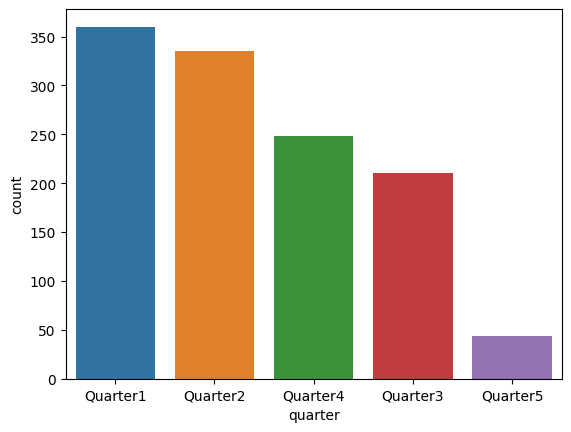

In [15]:
value_quarter = pd.DataFrame(df["quarter"].value_counts()).reset_index()
value_quarter.columns = ["quarter" , 'count']
#print(value_quarter)
sns.barplot(data = value_quarter , x = 'quarter' , y = 'count')
# sns.countplot(df["quarter"])
# plt.show()

In [16]:
# Change Quarter5 to Quarter4
df["quarter"] = df["quarter"].replace({"Quarter5" : "Quarter4"})

In [17]:
# Department
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [18]:
# striping the space

df["department"] = df["department"].str.strip()

In [19]:
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

In [20]:
# sns.countplot(df["department"] , hue = df["day"])

In [21]:
# Friday seems to be holiday

In [22]:
df["smv"].dtype

dtype('float64')

In [23]:
#sns.countplot(df["team"])

In [24]:
# Actual Productivity is the Target column which has % value ranging from 0 - 1

In [25]:
#df["actual_productivity"] = round(df["actual_productivity"]*100 ,2)

# Checking Multi Collinearity

In [26]:

# plt.figure(figsize = (10,10))
# sns.heatmap(df.corr() , annot = True , cmap = "viridis")

In [27]:
# no.of workers and minute allocated are correlated more . But not ignoring any column as of now.

In [28]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [29]:
#df_corr = df.corr()

In [30]:
# sns.heatmap(df_corr[["actual_productivity"]].sort_values(by = 'actual_productivity' , 
#                                                          ascending = False) , annot =True , cmap ="Greens")

In [31]:
df.drop(columns = "day" , inplace =True)

In [32]:
df.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,1,0.75,3.94,0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,12,0.80,11.41,968,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170,1920,50,0.0,0,0,56.0,0.800382


# Outliers

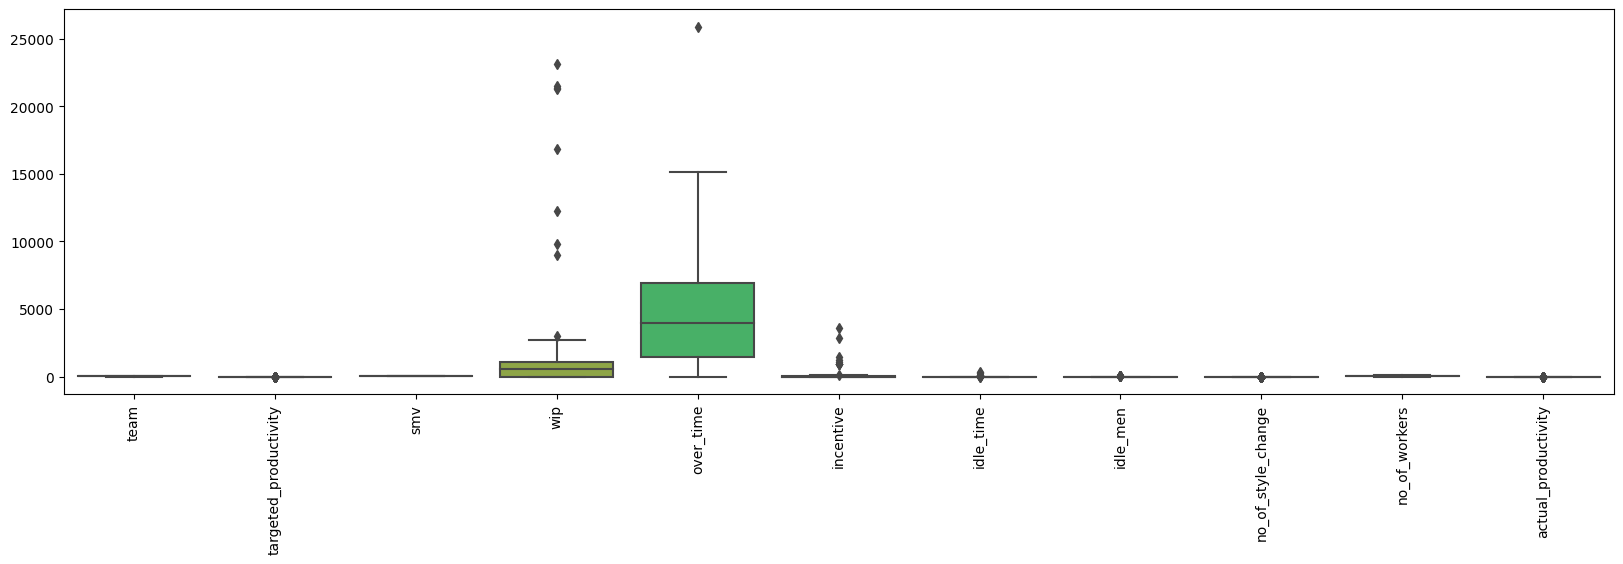

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, orient ='v')
plt.xticks(rotation=90)
plt.show()

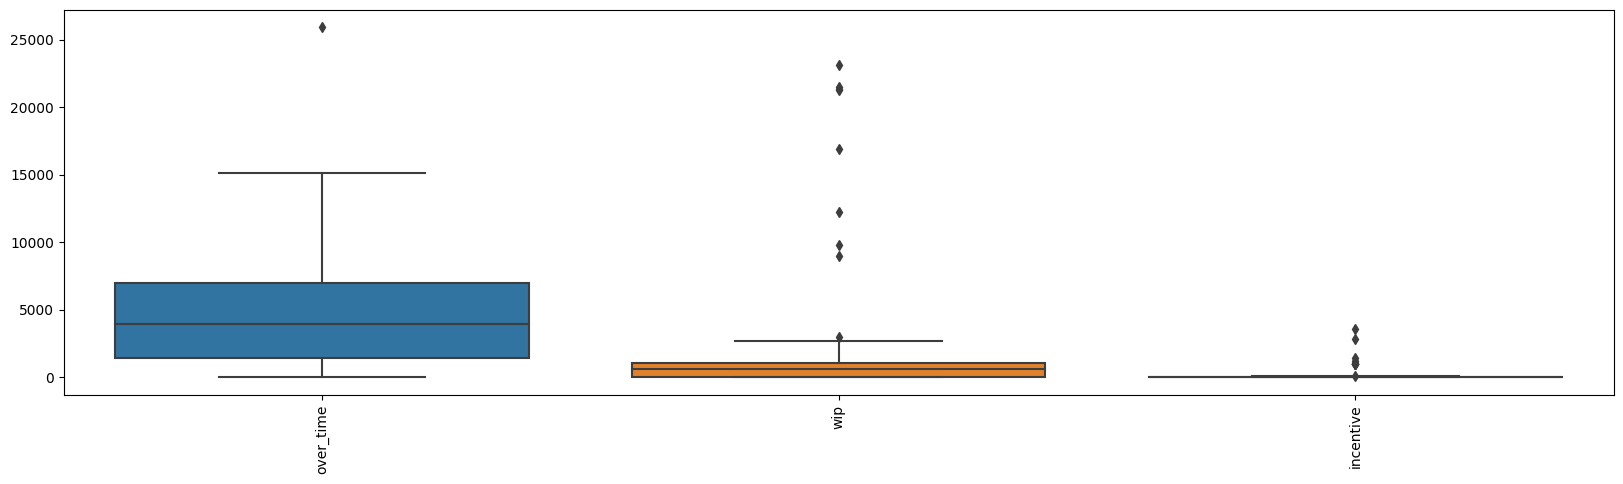

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Handling Outliers

In [35]:
Q1 = df["over_time"].quantile(0.25)
Q3 = df["over_time"].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
upper_limit = Q3 +1.5*IQR
print(upper_limit)

1440.0
6960.0
5520.0
-6840.0
15240.0


In [36]:
r = df[(df["over_time"] > lower_limit) & (df["over_time"] < upper_limit)]

In [37]:
df.shape[0]

1197

In [38]:
# Function to handle outliers
def outlier_IQR(data , cols):
    
    for col in cols:
        
        print(col)
    
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower_limit = Q1 - 1.5*IQR
        print("lower limit for column",col,"is:",lower_limit)
    
        upper_limit = Q3 + 1.5*IQR
        print("upper limit for column",col,"is:",upper_limit)
    
        data = data[(df[col] > lower_limit) & (data[col] < upper_limit)]
        
    
    return(data)
    

In [39]:
outlier_cols = ["over_time" , "wip" ,"incentive"]
df_outlier = outlier_IQR(df , outlier_cols)

over_time
lower limit for column over_time is: -6840.0
upper limit for column over_time is: 15240.0
wip
lower limit for column wip is: -1624.875
upper limit for column wip is: 2708.125
incentive
lower limit for column incentive is: -75.0
upper limit for column incentive is: 125.0


In [40]:
df_outlier.shape

(1176, 13)

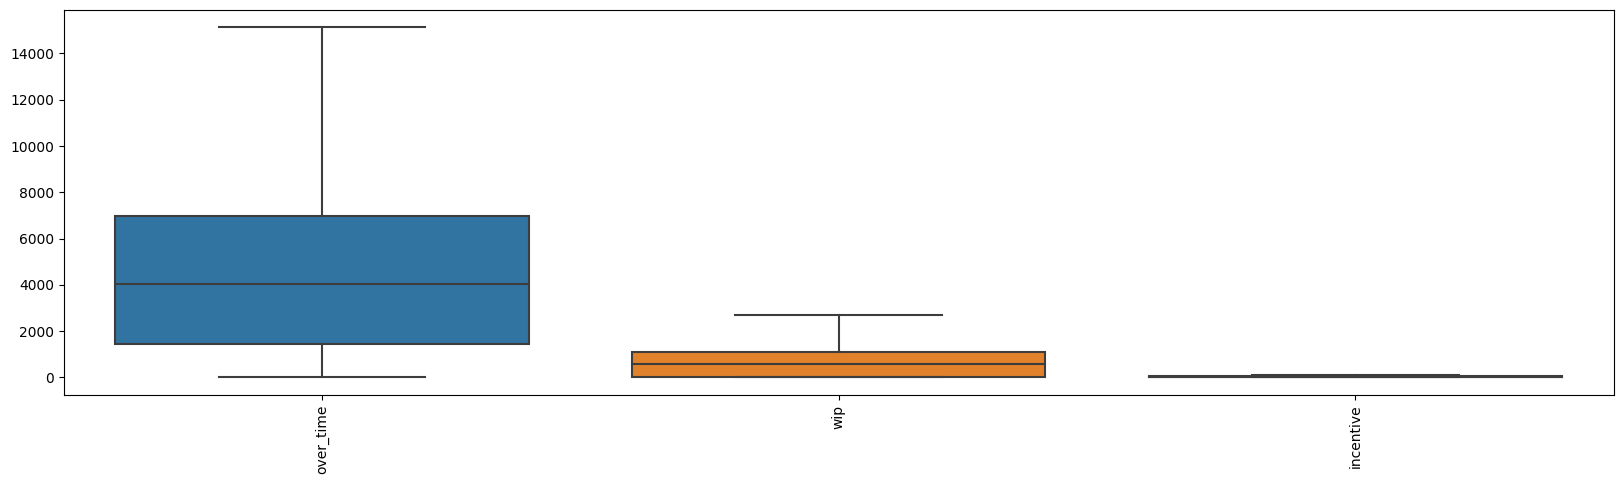

In [41]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_outlier[["over_time","wip","incentive"]], orient ='v')
plt.xticks(rotation=90)
plt.show()

# Preprocessing 

In [42]:
cat_cols = df_outlier.select_dtypes("object").columns

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
for i in cat_cols:
    df_outlier[i] = le.fit_transform(df_outlier[i])

In [45]:
# Have X and Y dataframes for Model Building
X = df_outlier.drop(columns = ["actual_productivity"])
y = df_outlier["actual_productivity"]

In [46]:
# Standard Scaling Training Dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y ,test_size =0.3 , random_state= 30)
columns_x = xtrain.columns
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape


((823, 12), (353, 12), (823,), (353,))

In [50]:
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error

In [51]:
# df_ss = pd.DataFrame(ss.fit_transform(xtrain))
# df_ss.columns = xtrain.columns
# df_ss.head()

In [52]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [53]:
# xtrain  = pd.DataFrame(xtrain)
# xtest = pd.DataFrame(xtest)
# xtrain.columns = columns_x
# xtest.columns = columns_x
# print(xtrain.head())

In [54]:
import pickle
pickle.dump(ss , open('scaling.pkl' , 'wb'))

#  Function to run different algorithms and getting their metrics

In [55]:
def model_metrics(algos):
    
    res = pd.DataFrame()
    df_pred_all = pd.DataFrame()
    
    
    for algo in algos:
        
        #print(algo)
        
        algo.fit(xtrain , ytrain)
        
        y_pred_train = algo.predict(xtrain)
        y_pred = algo.predict(xtest)


        df_pred = pd.DataFrame({"actual" : ytest ,
                                "predicted" : y_pred,
                               "algo" : str(algo).split("(")[0]})
                
        df_pred_train = pd.DataFrame({"actual" : ytrain ,
                                "predicted_train" : y_pred_train})
        
        #df_pred_all = df_pred_all.append(df_pred)
        df_pred_all = pd.concat([df_pred_all, df_pred], ignore_index=True)
        
        mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
        mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
        
    # Adjusted R-square : 1 - [(1-Rsquare)*(n - 1) / (n - k - 1)] n = no.of sample , k =no.of.features
        #adj_r2score = 1 - [((1-r2score)*(len(ytest)-1))/(len(ytest)-xtest.shape[1]-1)]
        
        mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
        r2score_train = r2_score(df_pred_train["actual"] , df_pred_train["predicted_train"])
       
        
        df_metric = pd.DataFrame({'model' : str(algo).split("(")[0],
                                  "mse" : [mse], 
                                  #"mae" : [mae],
                                  "r2score" : [r2score],
                                  "mse_train" :[mse_train],
                                  #"mae_train" :[mae_train],
                                 "r2score_train" : [r2score_train]
                                 })

        
        #res = res.append(df_metric)
        res = pd.concat([res, df_metric], ignore_index=True)
     
    print(res)
    #print(tabulate(res , headers='keys', tablefmt='psql'))
    
    print("The Lowest MSE model is :")
    model_good = pd.DataFrame(res.iloc[res["mse"].argmin()]).T.set_index('model')
    print(tabulate(model_good , headers ='keys' , tablefmt = 'psql'))

    return df_pred_all
        

In [56]:
# def model_metrics(algos):
#     res = pd.DataFrame()
    
    
#     for algo in algos:
        
#         #print(algo)
        
#         algo.fit(xtrain , ytrain)
        
#         y_pred_train = algo.predict(xtrain)
#         y_pred = algo.predict(xtest)

        
#         df_pred = pd.DataFrame({"actual" : ytest ,
#                                 "predicted" : y_pred})
        
#         df_pred_train = pd.DataFrame({"actual" : ytrain ,
#                                 "predicted_train" : y_pred_train})
        
#         mse = mean_squared_error(df_pred["actual"] , df_pred["predicted"])
#         mae = mean_absolute_error(df_pred["actual"] , df_pred["predicted"])
        
#         mse_train = mean_squared_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         mae_train = mean_absolute_error(df_pred_train["actual"] , df_pred_train["predicted_train"])
#         #print(mse_train , mae_train)
        
#         #r2score = r2_score(df_pred["actual"] , df_pred["predicted"])
       
        
#         df_metric = pd.DataFrame({'model' : str(algo),
#                                   "mse" : [mse], 
#                                   "mae" : [mae],
#                                   "mse_train" :[mse_train],
#                                   "mae_train" :[mae_train]
#                                   #"r2_score" : [r2score]
#                                  })
#         res = res.append(df_metric)
        
#         #plt.figure(figsize=(8, 6))
        
        
        
#         plt.subplot(1, 2, 1)  # Create a subplot for test data regplot
#         sns.regplot(data=df_pred, x="actual", y="predicted", label=str(algo))
#         plt.title("Actual vs Predicted - Test Data")
        
#         plt.subplot(1, 2, 2)  # Create a subplot for train data regplot
#         sns.regplot(data=df_pred_train, x="actual", y="predicted_train", label=str(algo))
#         plt.title("Actual vs Predicted - Train Data")
        
#         plt.tight_layout()  # Adjust the spacing between subplots
        

        
#     plt.legend() 
#     return res.set_index('model')

        

In [57]:
val = model_metrics([lr , rf , gb , xgb])

                       model       mse   r2score  mse_train  r2score_train
0           LinearRegression  0.021653  0.316585   0.017530       0.407366
1      RandomForestRegressor  0.017996  0.432003   0.003488       0.882075
2  GradientBoostingRegressor  0.016903  0.466525   0.009943       0.663840
3               XGBRegressor  0.018265  0.423526   0.002107       0.928764
The Lowest MSE model is :
+---------------------------+-----------+-----------+-------------+-----------------+
| model                     |       mse |   r2score |   mse_train |   r2score_train |
|---------------------------+-----------+-----------+-------------+-----------------|
| GradientBoostingRegressor | 0.0169026 |  0.466525 |  0.00994328 |         0.66384 |
+---------------------------+-----------+-----------+-------------+-----------------+


In [58]:
# # Create subplots

# models = val['algo'].unique()
# #print(models)

# fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(12, 4))

# palette = sns.color_palette('Set2', n_colors=len(models))

# for i, category in enumerate(models):
#     ax = axes[i]
#     subset = val[val['algo'] == category]
#     sns.regplot(subset['actual'], subset['predicted'] , ax=ax, color=palette[i])
#     ax.set_title(f'Alg : {category}')


# plt.suptitle("Actual Vs Predicted for Test Data" , fontsize = 20)
# plt.tight_layout()

In [59]:
# lr Feature Importance
feature_importance_lr = lr.coef_

importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_lr})

importance_lr = importance_lr.sort_values(by='Importance', ascending=False)
#print(importance_lr)
# RF Feature Importance
feature_importance_rf = rf.feature_importances_

importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_rf})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)
#print(importance_rf)

# GradientBoost Feature Importance
feature_importance_gb = gb.feature_importances_

importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_gb})

importance_gb = importance_gb.sort_values(by='Importance', ascending=False)

# Plotting the Feature Importance 

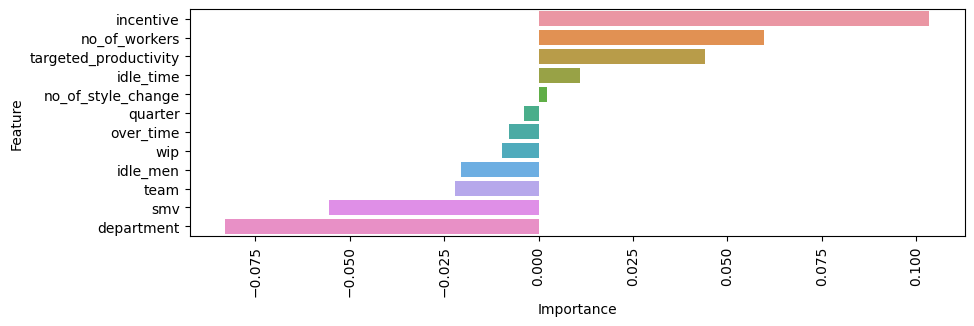

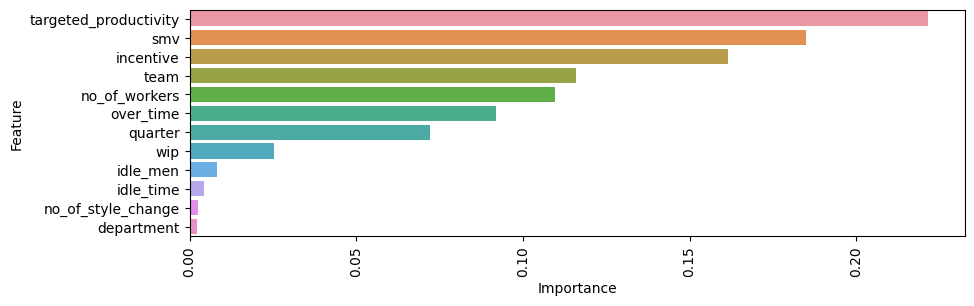

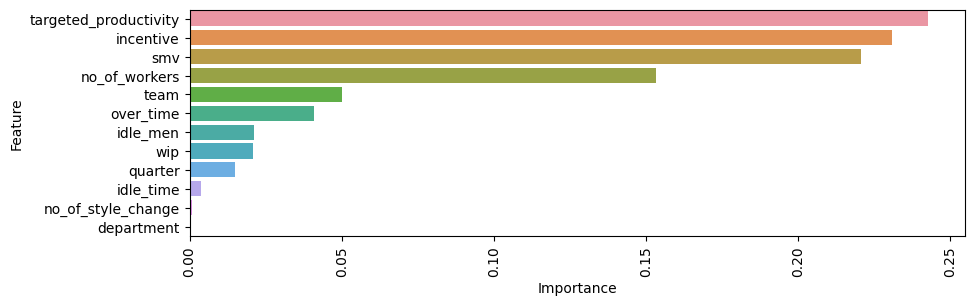

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(data = importance_lr , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(data = importance_rf , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()


plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(data = importance_gb , x = "Importance" ,y ="Feature")
plt.xticks(rotation = 90)
plt.show()

plt.tight_layout()

In [61]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 6))
# plot_tree(dt, filled=True)
# plt.show()

In [62]:
# Try prediction for some random rows
gb.predict([xtrain[0]])

array([0.83095446])

In [63]:
xtrain[0].dtype

dtype('float64')

In [64]:
gb.predict([[-1.20126539,  0.84321925,  0.43718126,  0.71980038,  0.98056312,
        0.90044   ,  0.76923169,  2.37030984, -0.06135122, -0.1237932 ,
       -0.34966639,  1.09173831]])

array([0.93612771])

In [65]:
gb.predict(ss.transform([X.iloc[10]]))

array([0.69467282])

In [66]:
ch_predict = [X.iloc[9]]
print(ch_predict)


[quarter                     0.00
department                  1.00
team                        1.00
targeted_productivity       0.75
smv                        28.08
wip                       681.00
over_time                6900.00
incentive                  45.00
idle_time                   0.00
idle_men                    0.00
no_of_style_change          0.00
no_of_workers              57.50
Name: 9, dtype: float64]


In [67]:
gb.predict(ss.transform(ch_predict))

array([0.77364505])

In [68]:
y[9]

0.750427826

In [69]:
# crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
# crossvalidation

In [70]:

# search_grid={'n_estimators':[500,1000,1500],
#              'learning_rate':[.001,0.01,.1],
#              'max_depth':[1,2,4],
#              'subsample':[.5,.75,1],
#              'random_state':[1]}

# search=GridSearchCV(estimator = gb,
#                     param_grid=search_grid,
#                     scoring='neg_mean_squared_error',
#                     n_jobs=1,
#                     cv=crossvalidation)


In [71]:
# st_time = time.time()
# search.fit(xtrain,ytrain)
# search.best_params_
# end_time = time.time()
# print("elapsed_time_is : " ,end_time-st_time)

#  Pickling the model file for Deployment


In [72]:
import picklebi

In [73]:
pickle.dump(gb, open('gradient_model.pkl','wb'))

In [74]:
# Load the pickle file for checking
pkl_model = pickle.load(open('gradient_model.pkl' , 'rb'))

In [75]:
pkl_model.predict(ss.transform([X.iloc[10]]))

array([0.69467282])

In [76]:
X.iloc[10]

quarter                     0.00
department                  1.00
team                        9.00
targeted_productivity       0.70
smv                        28.08
wip                       872.00
over_time                6900.00
incentive                  44.00
idle_time                   0.00
idle_men                    0.00
no_of_style_change          0.00
no_of_workers              57.50
Name: 10, dtype: float64

In [6]:
dat = {
		"quarter": 0.00,
		"department": 1.00,
		"team": 9.00,
		"targeted_productivity": 0.70,
		"smv": 28.08,
		"wip": 872.00,
		"over_time": 6900.00,
		"incentive": 44.00,
		"idle_time": 0.00,
		"idle_men": 0.00,
		"no_of_style_change": 0.00,
		"no_of_workers": 57.50
	}




In [13]:
import numpy as np
import pickle
model_gb = pickle.load(open("gradient_model.pkl","rb"))
scalar = pickle.load(open('scaling.pkl' , 'rb'))
print(model_gb.predict((np.array(list(dat.values())).reshape(1,-1))))

[0.77626502]


TypeError: 'NoneType' object is not subscriptable

In [5]:
dat.keys()

dict_keys(['data'])